In [1]:
import networkx as nx
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import community
from sentiment_analysis.sent_analysis import get_sents

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eskeh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
with open('graph_analysis/Bipartite_G_5251_cutoff_v2.pkl', 'rb') as f:
    G = pickle.load(f)

In [3]:
node_att = nx.get_node_attributes(G, 'bipartite')
posts = [node for node in G.nodes if node_att[node]]
n = nx.subgraph(G, posts)

sents = get_sents(nx.get_node_attributes(n, 'text'))

  0%|          | 0/4984 [00:00<?, ?it/s]

  2%|▏         | 116/4984 [00:10<08:55,  9.08it/s]c:\Users\eskeh\OneDrive\Skrivebord\social_graphs\SGI_exam_project\sentiment_analysis\sent_analysis.py:22: RuntimeWarning: invalid value encountered in scalar divide
  np.sum([sentiment_dict[word] * tf[word] for word in tf.keys() if word in list(sentiment_dict.keys())]) /
100%|██████████| 4984/4984 [07:41<00:00, 10.80it/s]


{'/forum/1/2401684/2401684/': 0.625,
 '/forum/1/2422497/2422497/': 0.7058823529411765,
 '/forum/1/2392661/2392661/': -0.8695652173913043,
 '/forum/1/2397543/2397543/': 0.8571428571428571,
 '/forum/1/2393477/2393477/': 0.44,
 '/forum/1/2041371/2041371/': 0.4227405247813411,
 '/forum/1/2404173/2404173/': 1.1666666666666667,
 '/forum/1/2417938/2417938/': 0.5348837209302325,
 '/forum/1/2415116/2415116/': 0.8717948717948718,
 '/forum/1/2420807/2420807/': 1.0,
 '/forum/1/2390864/2390864/': 0.49295774647887325,
 '/forum/1/2420145/2420145/': 0.71875,
 '/forum/1/2422178/2422178/': 0.625,
 '/forum/1/2431083/2431083/': 0.4444444444444444,
 '/forum/1/2409629/2409629/': 1.103448275862069,
 '/forum/1/2419309/2419309/': 0.050505050505050504,
 '/forum/1/2422271/2422271/': 0.5,
 '/forum/1/2430999/2430999/': 1.5,
 '/forum/1/2394991/2394991/': 0.8125,
 '/forum/1/2408950/2408950/': 0.8333333333333334,
 '/forum/1/2426870/2426870/': 0.5714285714285714,
 '/forum/1/2416296/2416296/': 0.8571428571428571,
 '/fo

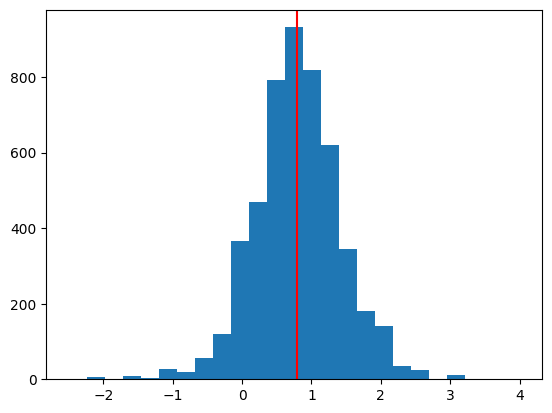

In [23]:
import numpy as np
sents = list(sents.values())
sents = np.nan_to_num(sents)

plt.axvline(np.mean(sents), color = "red")
plt.hist(sents, bins=25)
plt.show()

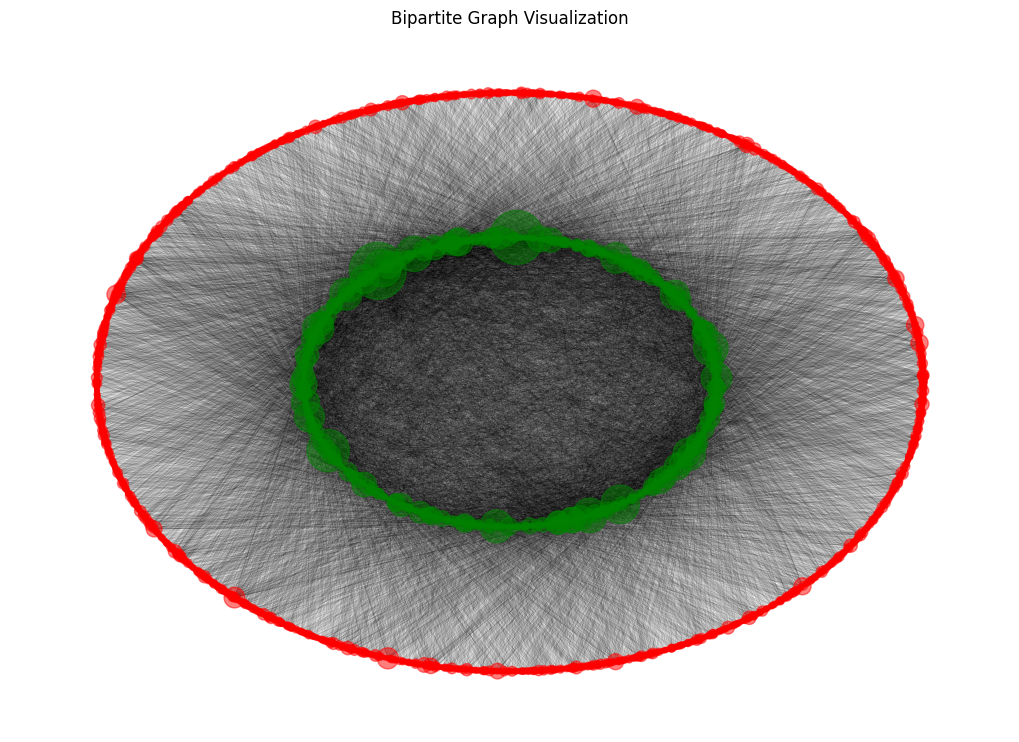

In [93]:
def plot_bipartite_graph(bipartite_graph):
    # Extract the sets of nodes in each bipartite set
    top_nodes = {n for n, d in bipartite_graph.nodes(data=True) if d['bipartite'] == 0}
    bottom_nodes = set(bipartite_graph) - top_nodes

    # Choose a layout algorithm suitable for bipartite graphs
    # pos = nx.bipartite_layout(bipartite_graph, top_nodes)
    # pos = nx.spring_layout(bipartite_graph, pos=pos, seed=42, dim=2)
    pos = nx.shell_layout(bipartite_graph, nlist=[top_nodes, bottom_nodes])

    # Define colors for nodes in each partition
    colors = ['green' if n in top_nodes else 'red' for n in bipartite_graph.nodes]
    
    # Define sizes for nodes based on their degree
    node_sizes = [2.0 * bipartite_graph.degree[node] for node in bipartite_graph.nodes]

    plt.figure(figsize = (10,7))
    # Plot the bipartite graph with different node colors
    nx.draw(bipartite_graph, pos=pos, with_labels=False, font_weight='bold', node_size=node_sizes, node_color=colors, width = 0.03, alpha=0.5)

    plt.title("Bipartite Graph Visualization")
    plt.show()

plot_bipartite_graph(G)